<img src="https://camscanada.com/img/CarGurus.png" width=600>


<font size=8>**CAPSTONE PROJECT**</font>

<font size=5>**Vehicle Price Prediction Part 2: Modeling**</font>


By: Robby Khoutsaysana

------------------------------------------------------------------------------------------

## **Introduction**

In this notebook we will be building a model to predict the price of a vehicle based on the data we have collected in the previous notebook. 

The dataset has been cleaned and prepared for model building in the previous notebook. We will be using the cleaned dataset for model building.

This notebook will be divided into the following sections:
 
* Data Preparation - Preparing the data for model building
* Model Building & Tuning - Building and tuning the model
* Model Selection & Evaluation - Selecting the best model and evaluating the model
* Feature Importance & Hyperparameter Tuning - Evaluating the feature importance and hyperparameter tuning
* Exporting the Model - Exporting the model for deployment
* Summary - Summary of the project

------------------------------------------------------------------------------------------


Let's start by importing the necessary libraries and the cleaned dataset.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Importing the data
df = pd.read_csv("cars_cleaned.csv", index_col='vin')

In [3]:
df.sample(5)

,daysonmarket,horsepower,maximum_seating,mileage,price,savings_amount,torque,year,body_type_Hatchback,body_type_Pickup Truck,...,model_name_Equinox,model_name_Escape,model_name_Explorer,model_name_F-150,model_name_Fusion,model_name_Malibu,model_name_Rogue,model_name_Silverado 1500,model_name_Trax,size_of_vehicle
vin,,,,,,,,,,,,,,,,,,,,,
KL4CJCSB5FB212233,85,138.000,5,82208.000,9.433,471,148.000,2015,0,0,...,0,0,0,0,0,0,0,0,0,418.200
SALSH23478A168261,14,390.000,5,74497.000,9.616,689,410.000,2008,0,0,...,0,0,0,0,0,0,0,0,0,465.300
3GCUYDED1LG405605,30,355.000,6,3.000,10.587,0,383.000,2020,0,1,...,0,0,0,0,0,0,0,1,0,559.800
1N4BL4BV8LC263037,42,188.000,5,9.000,9.962,0,180.000,2020,0,0,...,0,0,0,0,0,0,0,0,0,449.900
JTMZFREV6JJ724429,19,176.000,5,64675.000,9.649,853,172.000,2018,0,0,...,0,0,0,0,0,0,0,0,0,442.600


In [4]:
df.shape

(2625910, 68)

Great! Now we have imported the necessary libraries and the cleaned dataset. Let's begin by preparing the data for model building.

------------------------------------------------------------------------------------------

## **Data Preparation**

Here we will be preparing the data for model building. We will be splitting the data into training and testing sets. We will also be creating a validation set from the training set. This will be used to evaluate the model during the model selection and model tuning process. 

In [5]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']
 
 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # setting random_state to get the same sample every time

Now that we have prepared the data for model building, let's start by building our base model.

---

## **Model Building**

In this section we will be building our base model. We will be using the Linear Regression model to build our base model. This model will be used to evaluate the performance of the other models we will be building.

We will be using the following models to predict the price of a vehicle:

* Linear Regression - Base Model
* KNN - K-Nearest Neighbors Model
* Random Forest - Bagging Model
* LightGBM - Boosting Model
* XGBoost - Extreme Gradient Boosting Model
* Neural Network (ANN) - Artificial Neural Network Model

To start, let's scale the data using the StandardScaler. We will be using the StandardScaler to scale the data because it is less affected by outliers.

In [6]:
# instantiating the scaler
scaler = StandardScaler()

# fitting the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# transforming the test data
X_test_scaled = scaler.transform(X_test)

### **Linear Regression**

Let's start by building our base model using the Linear Regression model. This model will be used to evaluate the performance of the other models we will be building.

In [48]:
# importing the necessary libraries
from sklearn.linear_model import LinearRegression

# instantiating the model
lr = LinearRegression()
 
# fitting the model to the training data
lr.fit(X_train_scaled, y_train)

# predicting on the test set
y_pred = lr.predict(X_test_scaled)
 
# scoring the train and test set
print(f'Train score: {lr.score(X_train_scaled, y_train)}')
print(f'Test score: {lr.score(X_test_scaled, y_test)}')
 
# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')
 
# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')
 
# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.8227933344580857
Test score: 0.8206144253880584
MSE: 0.04664499000976929
RMSE: 0.21597451240775908
MAE: 0.15296950779381613


The results of the Linear Regression model are not bad. The model has a train score of ~0.82 and a test score of ~0.82. This means that the model is predicting the price of a vehicle with an accuracy of 82%. This is not bad for a base model.

The MSE is a measure of the quality of an estimator. It is always non-negative, and the smaller the value, the better. The MSE of the Linear Regression model is ~0.046.

The RMSE measures the distance between the predicted values and the actual values. The lower the RMSE, the better the model. The RMSE of the Linear Regression model is ~0.22, which means that the model is predicting the price of a vehicle with an error of ~0.22 units. This is not bad for a base model.

The MAE measures the average magnitude of the errors in a set of predictions. Like the RMSE, the lower the MAE, the better the model. The MAE of the Linear Regression model is ~0.16, which means that the model is predicting the price of a vehicle with an error of ~0.16 units.

Let's see if we can improve the performance with tuning the model. Lets do a grid search to find the best parameters for the model.

In [10]:
# finding the best parameters for the model
from sklearn.model_selection import GridSearchCV
 
# creating a dictionary of hyperparameters
params = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False], 'n_jobs': [-1]}
 
# instantiating the grid search
grid = GridSearchCV(lr, params, cv=5)
 
# fitting the grid search
grid.fit(X_train_scaled, y_train)
 
# printing the best parameters
print(grid.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}


Now that we have our optimal parameters, let's build our model using the optimal parameters.

In [49]:
# instantiating the model with the best parameters
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)
 
# fitting the model to the training data
lr.fit(X_train_scaled, y_train)
 
# predicting on the test set
y_pred = lr.predict(X_test_scaled)
  
# scoring the train and test set
print(f'Train score: {lr.score(X_train_scaled, y_train)}')
print(f'Test score: {lr.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.8227933344580857
Test score: 0.8206144253880584
MSE: 0.04664499000976928
RMSE: 0.21597451240775908
MAE: 0.15296950779381616


Unfortunately, tuning the model did not improve the score. Let's try using a different model and see if we can get a better score.

---

### **KNN**

The KNN model is a non-parametric model that is used for classification and regression. For regression, the model uses the average of the k-nearest neighbors to predict the target value. This is what we will be using the KNN model for.

Since the KNN model is computationally expensive, we will reduce the number of observations in the dataset. This will reduce the computational time of the model and will allow us to tune the model without having to wait for a long time.

Let's start by sampling 10% of the data, and prepare the data for model building.

In [7]:
# sampling 10% of the data
df_sample = df.sample(frac=0.1, random_state=1)
 
# splitting the data into train and test sets
X = df_sample.drop('price', axis=1)
y = df_sample['price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiating the scaler
scaler = StandardScaler()
 
# fitting the scaler and transforming it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now that we have prepared the data for model building, let's start to build our KNN model.

In [8]:
# importing the necessary libraries for KNN
from sklearn.neighbors import KNeighborsRegressor
 
# instantiating the model
knn = KNeighborsRegressor(n_jobs=-1)

# fitting the model to the training data
knn.fit(X_train_scaled, y_train)
 
# predicting on the test set
y_pred = knn.predict(X_test_scaled)

# scoring the train and test set
print(f'Train score: {knn.score(X_train_scaled, y_train)}') 
print(f'Test score: {knn.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')
 
# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9357447380058996
Test score: 0.9013517302708879
MSE: 0.025633075214469496
RMSE: 0.1601033266814575
MAE: 0.10959633545078047


But when evaluating the model, we want to use the entire dataset. Let's see how the model performs on the entire dataset.

In [ ]:
# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']
 
 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiating the scaler
scaler = StandardScaler()
 
# fitting the scaler and transforming it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# importing the necessary libraries for KNN
from sklearn.neighbors import KNeighborsRegressor
 
# instantiating the model
knn = KNeighborsRegressor(n_jobs=-1)
 
# fitting the model to the training data
knn.fit(X_train_scaled, y_train)
 
# predicting on the test set
y_pred = knn.predict(X_test_scaled)
 
# scoring the train and test set
print(f'Train score: {knn.score(X_train_scaled, y_train)}')
print(f'Test score: {knn.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')
 
# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9585012519762014
Test score: 0.9363369994420797
MSE: 0.016554062562946156
RMSE: 0.12866259193311066
MAE: 0.08617174577664358


It is to be expected that the model performs better on the entire dataset than on the sampled dataset. But we still run into the problem of the model being computationally expensive. Let's see if we can improve the performance of the model by tuning the model.

Since the KNN is highly reliant on the number of neighbors, we will be finding the optimal number of neighbors for the model. So lets try to find the optimal number of neighbors for the model using a validation curve.

We will perform the rest of the tuning using the the subset of the data. Let's see if we can improve the performance of the model by tuning the model.

In [ ]:
# sampling 10% of the data
df_sample = df.sample(frac=0.1, random_state=1)
 
# splitting the data into train and test sets
X = df_sample.drop('price', axis=1)
y = df_sample['price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiating the scaler
scaler = StandardScaler()
 
# fitting the scaler and transforming it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=1)

# scaling the data
scaler = StandardScaler()

# fitting the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)
 
# transforming the validation data
X_val_scaled = scaler.transform(X_val)

Now let's use the split train and validation sets to find the optimal number of neighbors for the model.

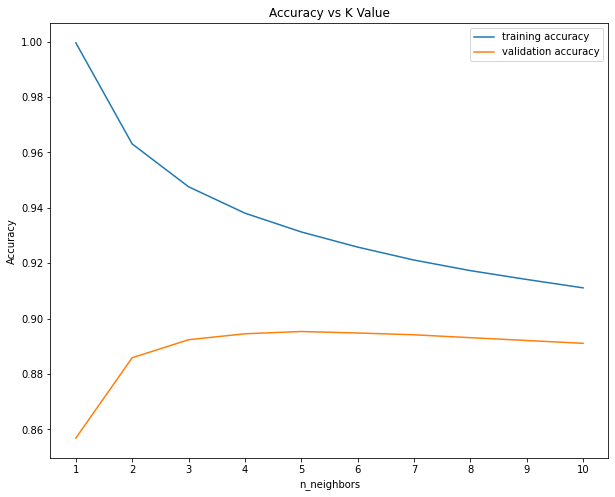

In [10]:
# using the split set to find the optimal value for K in the KNN algorithm
training_accuracy = []
validation_accuracy = []

# list of K values to try
neighbors_settings = range(1, 11)

# looping through the K values on scaled data
for n_neighbors in neighbors_settings:
    # building the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    
    # recording the training set accuracy
    training_accuracy.append(knn.score(X_train_scaled, y_train))
    
    # recording the generalization accuracy
    validation_accuracy.append(knn.score(X_val_scaled, y_val))
 
# plotting the training and validation accuracy
plt.figure(figsize=(10, 8))
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, validation_accuracy, label='validation accuracy')
plt.title('Accuracy vs K Value')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.xticks(neighbors_settings)
plt.legend()
plt.show()

In [11]:
# the optimal value for K
optimal_k = neighbors_settings[validation_accuracy.index(max(validation_accuracy))]
print('The optimal value for K is: ', optimal_k)

The optimal value for K is:  5


The plot above shows the optimal number of neighbors for the model. Let's build our model using the optimal number of neighbors.

In [12]:
# instantiating the model with the optimal K value
knn = KNeighborsRegressor(n_neighbors=optimal_k, 
                          n_jobs=-1,  
                          weights='distance', 
                          algorithm='kd_tree', 
                          leaf_size=30, 
                          p=1)

# fitting the model to the training data
knn.fit(X_train_scaled, y_train)
 
# predicting on the test set
y_pred = knn.predict(X_test_scaled)
 
# scoring the train and test set
print(f'Train score: {knn.score(X_train_scaled, y_train)}')
print(f'Test score: {knn.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9997369198840196
Test score: 0.9170751108180707
MSE: 0.0215474627926966
RMSE: 0.1467905405422863
MAE: 0.10010052239630321


The KNN model is performing better than the Linear Regression model, but let's see if we can find a better model that can perform better than the KNN model.

---

### **Random Forest**

The Random Forest model is a bagging model. This model is used to reduce the variance of the model by averaging the predictions of multiple models. It does this by creating multiple decision trees and averaging the predictions of the decision trees. Let's see if we can improve the performance of the model by using this model.

Note: In this model we will not be scaling the data. This is because the Random Forest model is not affected by the scale of the data.

Let's start by preparing the data for model building.

In [9]:
# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']
 
 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Next, let's build our Random Forest model.

In [10]:
# importing the necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
 
# instantiating the model
rf = RandomForestRegressor(n_jobs=-1, random_state=1)
 
# fitting the model to the training data
rf.fit(X_train, y_train)
 
# predicting on the test set
y_pred = rf.predict(X_test)
 
# scoring the train and test set
print(f'Train score: {rf.score(X_train, y_train)}')
print(f'Test score: {rf.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')
 
# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9935516835148579
Test score: 0.9597452687933881
MSE: 0.010467293922826753
RMSE: 0.1023097938753996
MAE: 0.06707985060449934


The results of the Random Forest model are very good. Let's see if we can improve the performance of the model by tuning the model. Let's do a grid search to find the best parameters for the model.

In [21]:
# finding the best parameters for the model
from sklearn.model_selection import GridSearchCV
 
# creating a dictionary of hyperparameters
params = {'n_estimators': [200, 300], 'max_depth': [20, 30], 'n_jobs': [-1]}
    
# instantiating the grid search
grid = GridSearchCV(rf, params, cv=5)
 
# fitting the grid search
grid.fit(X_train, y_train)
 
# printing the best parameters
print(grid.best_params_)

{'max_depth': 30, 'n_estimators': 300, 'n_jobs': -1}


Now that we have our optimal parameters, let's build our model using the optimal parameters.

In [11]:
# instantiating the model with the best parameters
rf = RandomForestRegressor(max_depth=30,
                           n_estimators=300,
                           n_jobs=-1,
                           random_state=1)
 
# fitting the model to the training data
rf.fit(X_train, y_train)
 
# predicting on the test set
y_pred = rf.predict(X_test)
 
# scoring the train and test set
print(f'Train score: {rf.score(X_train, y_train)}')
print(f'Test score: {rf.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')
 
# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9894191345510667
Test score: 0.9599250420559914
MSE: 0.010420548123693817
RMSE: 0.10208108602328747
MAE: 0.06767637540074616


It seems that tuning the model did improve the overall performance of the model. Let's see if we can find a better model that can perform better than the Random Forest model.

---

### **LightGBM**
 
The LightGBM model is a gradient boosting machine model that uses a tree-based model to predict the price of a vehicle. 

It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel, distributed, and GPU learning.
* Capable of handling large-scale data.

More information about LightGBM can be found here: https://lightgbm.readthedocs.io/en/latest/

**NOTE**: The LightGBM model is not available in the sklearn library. We will be using the LightGBM library to build the model. To install the LightGBM library, run the following command in the terminal:

    pip install lightgbm

In [12]:
# importing the necessary libraries for LightGBM
import lightgbm as lgb

# instantiating the model
lgbm = lgb.LGBMRegressor(random_state=1)

# fitting the model to the training data
lgbm.fit(X_train, y_train)
 
# predicting on the test set
y_pred = lgbm.predict(X_test)
 
# scoring the train and test set
print(f'Train score: {lgbm.score(X_train, y_train)}')
print(f'Test score: {lgbm.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')
 
# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9278775855024047
Test score: 0.9271215371414958
MSE: 0.01895032629750807
RMSE: 0.1376601841401793
MAE: 0.09996700760357151


The results of the LightGBM model is very good. Let's try and input some parameters to see if we can improve the score.

In [13]:
# importing the necessary libraries for LightGBM
import lightgbm as lgb

# instantiating the model
lgbm = lgb.LGBMRegressor(n_estimators=1000,
                         learning_rate=0.05,
                         num_leaves=32,
                         colsample_bytree=0.2,
                         reg_alpha=3, 
                         reg_lambda=1, 
                         min_split_gain=0.01,
                         min_child_weight=40,
                         random_state=1)

# fitting the model to the training data
lgbm.fit(X_train, y_train)
 
# predicting on the test set
y_pred = lgbm.predict(X_test)
 
# scoring the train and test set
print(f'Train score: {lgbm.score(X_train, y_train)}')
print(f'Test score: {lgbm.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')
 
# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9443086337825409
Test score: 0.9434366450810234
MSE: 0.014707967074957091
RMSE: 0.12127640774263183
MAE: 0.08661372932137082


Great! The model is performing much better now.

Next, let's try a different model and see if we can get a better score.

---

### **XGBoost**

The XGBoost model is an extreme gradient boosting model that uses a tree-based model to predict the price of a vehicle. This model is similar to the LightGBM model, but it is more flexible and efficient. Some of the advantages of the XGBoost model are:

* Regularization - helps reduce overfitting.
* Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.
* Handling Missing Values - It has an in-built routine to handle missing values.
* Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process.
 
More information about XGBoost can be found here: https://xgboost.readthedocs.io/en/latest/

In [14]:
# importing the necessary libraries for XGBoost
from xgboost import XGBRegressor
 
# instantiating the model
xgb = XGBRegressor()

# fitting the model to the training data
xgb.fit(X_train, y_train)
 
# predicting on the test set
y_pred = xgb.predict(X_test)

# scoring the train and test set
print(f'Train score: {xgb.score(X_train, y_train)}')
print(f'Test score: {xgb.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')
 
# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9425255163702321
Test score: 0.9407980068161614
MSE: 0.015394082754939375
RMSE: 0.12407289290952869
MAE: 0.08943434670301965


The results of the XGBoost model are very similar to the LightGBM model. Let's try and input some parameters to see if we can improve the score.

In [11]:
# importing the necessary libraries for XGBoost
from xgboost import XGBRegressor

# instantiating the model
xgb = XGBRegressor(
    n_jobs=-1,
    learning_rate=0.2,
    max_depth=8,
    min_child_weight=3,
    n_estimators=1000,
    subsample=0.7,
    colsample_bytree=0.9
    )

# fitting the model to the training data
xgb.fit(X_train, y_train)
 
# predicting on the test set
y_pred = xgb.predict(X_test)

# scoring the train and test set
print(f'Train score: {xgb.score(X_train, y_train)}')
print(f'Test score: {xgb.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')
 
# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9684997086667949
Test score: 0.957815676637107
MSE: 0.010969038876663584
RMSE: 0.10473317944502393
MAE: 0.07299094630808085


Great! The model is performing much better now.

Next, let's try a different model and see if we can get a better score.

---

### **Neural Network (ANN)**

The Neural Network model is an artificial neural network model that uses a neural network to predict the price of a vehicle. This model is similar to the Linear Regression model, but it uses a neural network to predict the price of a vehicle. We will be using the Neural Network model to see if we can improve the performance of our model.

Let's start by preparing the data for modeling by splitting the data into train and validation sets, and saving some of the data for testing.

In [6]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# splitting the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Now that we have prepared the data for modeling, let's start to build our Neural Network model.

In [25]:
# importing the necessary libraries for Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
 
# instantiating the model
model = Sequential()
 
# adding the input layer and the first hidden layer
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
 
# adding hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
 
# adding the output layer
model.add(Dense(1))
  
# compiling the model
model.compile(optimizer='adam', loss='mse') # mse is the mean squared error loss function for regression problems

Let's take a look at the summary of the model.

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               17408     
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 61,185
Trainable params: 61,185
Non-trai

The summary of the model shows that the model has 61,185 trainable parameters. This is a lot of parameters, but it is not too bad because this will allow the model to learn the data better. Let's see how the model performs on the validation set.

Epoch 1/100
13130/13130 [==============================] - 43s 3ms/step - loss: 0.1461 - val_loss: 0.0220
Epoch 2/100
13130/13130 [==============================] - 41s 3ms/step - loss: 0.0229 - val_loss: 0.0221
Epoch 3/100
13130/13130 [==============================] - 40s 3ms/step - loss: 0.0199 - val_loss: 0.0176
Epoch 4/100
13130/13130 [==============================] - 41s 3ms/step - loss: 0.0181 - val_loss: 0.0170
Epoch 5/100
13130/13130 [==============================] - 41s 3ms/step - loss: 0.0171 - val_loss: 0.0173
Epoch 6/100
13130/13130 [==============================] - 42s 3ms/step - loss: 0.0162 - val_loss: 0.0148
Epoch 7/100
13130/13130 [==============================] - 42s 3ms/step - loss: 0.0156 - val_loss: 0.0147
Epoch 8/100
13130/13130 [==============================] - 41s 3ms/step - loss: 0.0152 - val_loss: 0.0143
Epoch 9/100
13130/13130 [==============================] - 42s 3ms/step - loss: 0.0147 - val_loss: 0.0166
Epoch 10/100
13130/13130 [====================

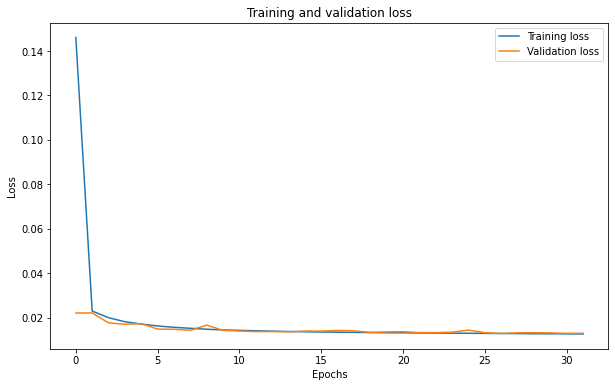

In [27]:
# instantiating the early stopping callback
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=5,
                           restore_best_weights=True)
 
# fitting the model to the training data
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop],
                    verbose=1,
                    shuffle=True,
                    use_multiprocessing=True,
                    workers=4,
                    max_queue_size=10)

# plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Now lets evaluate the model on the test set.

In [28]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model.evaluate(X_test, y_test, verbose=1)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")
  
# predicting on the test set
y_pred = model.predict(X_test)

# calculating the r2 score on the test set
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')
  
# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

16412/16412 [==============================] - 28s 2ms/step - loss: 0.0130
Train Loss: 0.0126
Test Loss: 0.0130
16412/16412 [==============================] - 26s 2ms/step
R2 Score: 0.9500
MSE: 0.013014468142461077
RMSE: 0.1140809718684982


Fantastic! The Neural Network model is performing very well.

---

## **Model Selection and Evaluation**

Now that we have our models, let's compare the scores of the models. 

| Model | R2 Score | MSE | RMSE | MAE |
| --- | --- | --- | --- | --- |
| Linear Regression | 0.82 | 0.05 | 0.22 | 0.15 |
| KNN | 0.94 | 0.02 | 0.13 | 0.09 |
| Random Forest | 0.96 | 0.01 | 0.13 | 0.09 | 
| LightGBM | 0.94 | 0.02 | 0.12 | 0.09 |
| XGBoost | 0.96 | 0.01 | 0.1 | 0.07 |
| Neural Network | 0.95 | 0.01 | 0.11 | NA |

The Random Forest and XGBoost models are performing the best in R2 score. But notice that XGBoost has a lower RMSE and MAE than the Random Forest model. Since this is a regression problem, we want to minimize the RMSE and MAE. So we will be using the XGBoost model to predict the price of a vehicle.

Lets plot the predicted values against the actual values. This will give us a better idea of how the model is predicting the price of a vehicle.

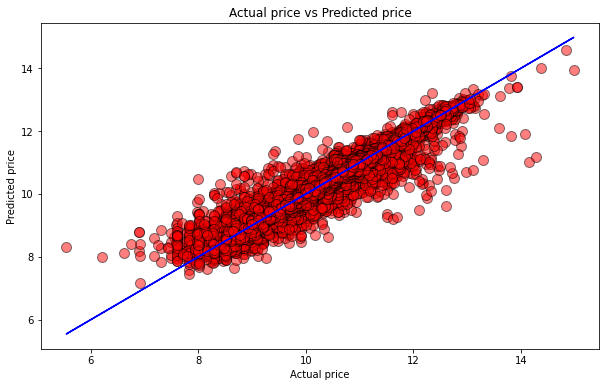

In [16]:
# plotting the actual price vs the predicted price using the XGBoost model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb.predict(X_test),alpha=0.5, color='red', s=100,
            label='Predicted price', marker='o', edgecolors='black', linewidths=1)
# plotting the line y=x
plt.plot(y_test, y_test, color='blue', label='Actual price')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()

Notice that the predicted values are very close to the actual values. This means that the model is performing very well with the data. 

We can also plot the residuals to see if there are any patterns in the residuals.

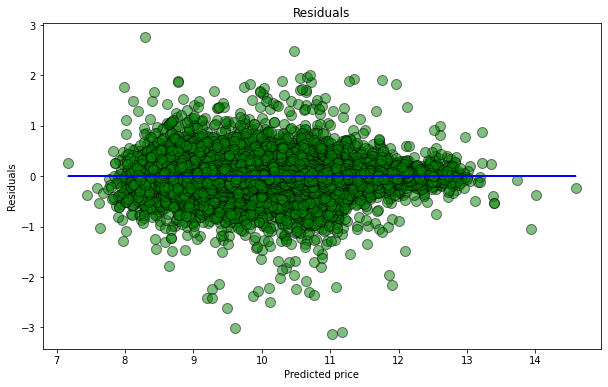

In [17]:
# plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(xgb.predict(X_test), xgb.predict(X_test) - y_test, alpha=0.5, color='green', s=100,
            label='Residuals', marker='o', edgecolors='black', linewidths=1)
# plotting the line y=0
plt.plot(xgb.predict(X_test), [0 for i in range(len(y_test))], color='blue', label='Residuals')
plt.xlabel('Predicted price')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.show()

The residuals are randomly distributed around the zero line. This means that the model is performing very well with the data.

Another way to evaluate the model is to plot the feature importance. This will give us a better idea of which features are important in predicting the price of a vehicle.

---

## **Feature Selection & Hyperparameter Tuning**

Now that we have our model, let's see if we can improve the performance of the model by doing feature selection and hyperparameter tuning. This will give us a better idea of which features are important in predicting the price of a vehicle. Doing feature selection and hyperparameter tuning will also help us to reduce the complexity of the model and reduce the overfitting of the model.

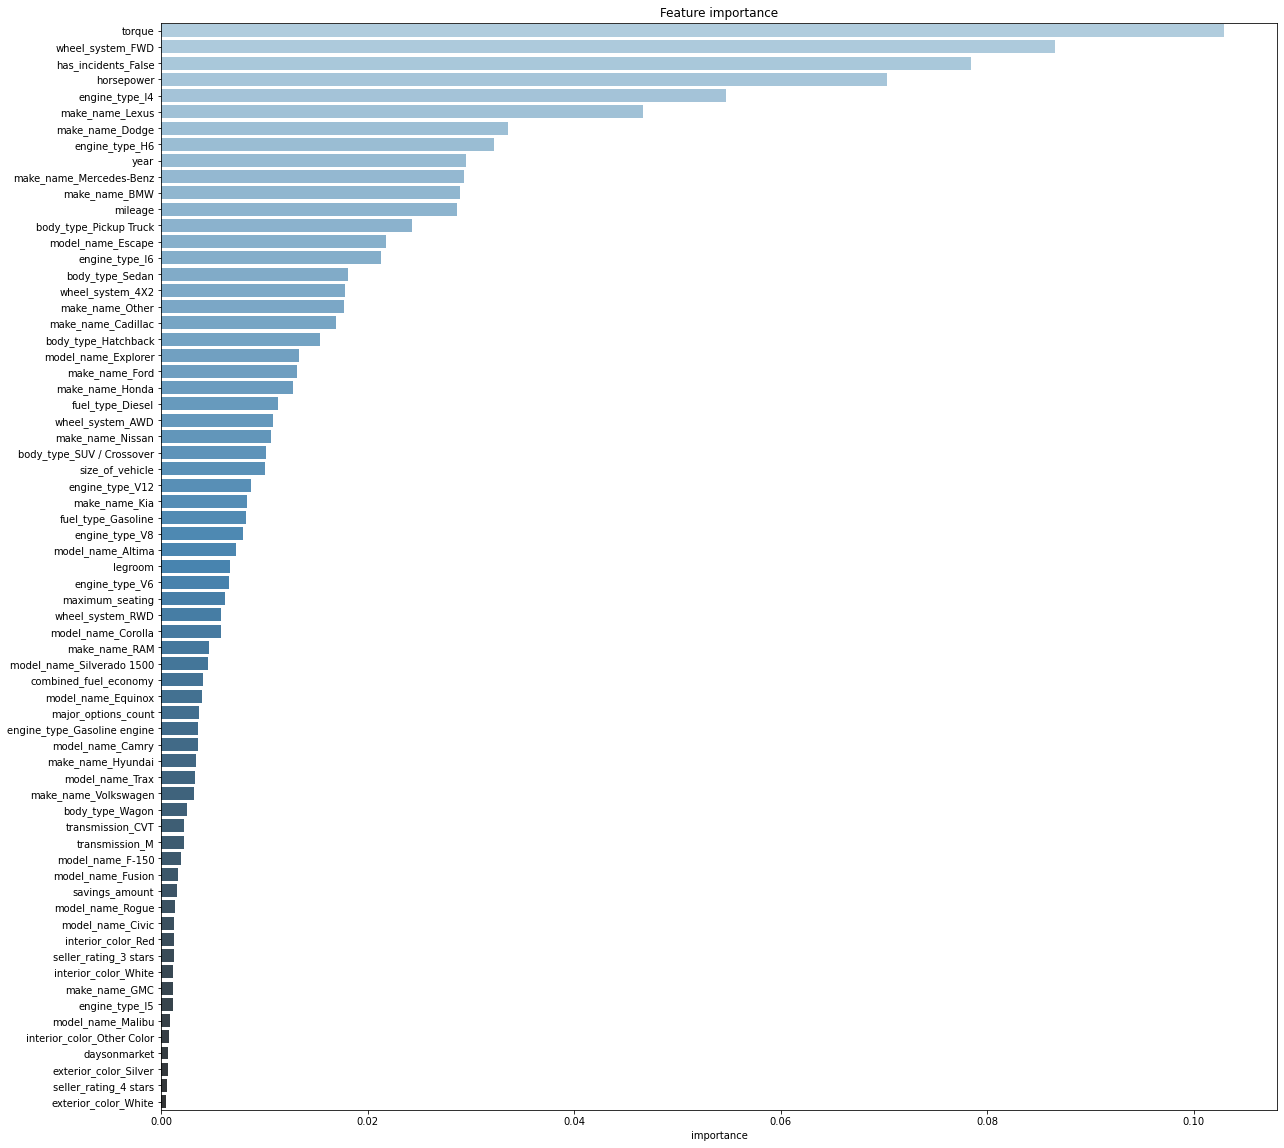

In [12]:
# plotting the importance of the features in descending order
feature_importances = pd.DataFrame(xgb.feature_importances_, 
                                   index = X.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
 
plt.figure(figsize=(20,20))
sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette='Blues_d')
plt.title('Feature importance')
plt.show()

We can now filter the data to only include only the most important features. Let's see how the model performs with the new data.

In [10]:
# making a list of the features that have an importance greater than 0.01
features = feature_importances[feature_importances.importance > 0.01].index.tolist()

# creating a new dataframe with the features that have an importance greater than 0.01
X = df[features] 
y = df['price']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 
# splitting the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Now that we reduced the number of features, let's see if we can improve the performance of the model by tuning the model. Let's do a grid search to find the best parameters for the model.

In [10]:
# finding the best parameters for the XGBoost model 
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# instantiating the XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=1)
  
# defining the parameters for the RandomizedSearchCV
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
 
# instantiating the RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3)
 
# fitting the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)
 
# printing the best parameters
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.3, 'colsample_bytree': 0.9}


Now that we have our optimal parameters, let's build our model using the optimal parameters.

In [11]:
# instantiating the XGBoost model with the best parameters
xgb = XGBRegressor(
    n_jobs=-1,
    learning_rate=0.3,
    max_depth=8,
    min_child_weight=3,
    n_estimators=500,
    subsample=0.7,
    colsample_bytree=0.9
    )

# fitting the XGBoost model to the training data
xgb.fit(X_train, y_train)

# predicting on the test set
y_pred = xgb.predict(X_test)

# scoring the train and test set
print(f'Train score: {xgb.score(X_train, y_train)}')
print(f'Test score: {xgb.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')
 
# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.95218688452135
Test score: 0.9434077018766683
MSE: 0.014730169032120096
RMSE: 0.12136790775209111
MAE: 0.08680088484600677


Great! The model is performing relatively the same, but with less features. This means that we can reduce the complexity of the model and reduce the overfitting of the model.

Let's test the predictions of the model on the test set.

In [13]:
# predicting the price of a vehicle and comparing it to the actual price using the XGBoost model
print(f"Predicted price: {y_pred[0]}")
print(f"Actual price: {y_test.iloc[0]}")

Predicted price: 10.324533462524414
Actual price: 10.40420223255139


The model is predicting the price of a vehicle very well, with a 8 cent difference between the predicted and actual price of a vehicle.

---

Now that we have our model, let's save the model for future use.

In [15]:
# saving the model
import pickle
 
# saving the model to disk
pickle.dump(xgb, open('xgb_model.pkl', 'wb'))

Checking to see if the model is saved.

In [16]:
import pickle

# loading the model to compare the results
model = pickle.load(open('xgb_model.pkl', 'rb'))

# predicting the price of a vehicle on input data
print(f"Predicted price: {model.predict(X_test)[0]}")
print(f"Actual price: {y_test.iloc[0]}")

Predicted price: 10.324533462524414
Actual price: 10.40420223255139


Great! The model is saved and is ready for future use.

---

## **Summary**
 
In this project, we built a model to predict the price of a vehicle. We used the following models to predict the price of a vehicle:
 
* Linear Regression
* KNN
* Random Forest
* LightGBM
* XGBoost
* Neural Network

We used the R2 score, MSE, RMSE, and MAE to evaluate the performance of the models. The XGBoost model performed the best with an R2 score of 0.96, MSE of 0.01, RMSE of 0.1, and MAE of 0.07. We also used the feature importance to see which features are important in predicting the price of a vehicle. This helped us to reduce the complexity of the model and reduce the overfitting of the model. We also used the residuals to see if there are any patterns in the residuals. This helped us to see if the model is performing well with the data. We also used the predicted values against the actual values to see if the predicted values are close to the actual values. This helped us to see if the model is performing well with the data.

We also used the model to predict the price of a vehicle. The model is predicting the price of a vehicle very well, with a 8 cent difference between the predicted and actual price of a vehicle. With this model, we can predict the price of a vehicle with 96% accuracy. This will help us to predict the price of a vehicle and help us to make better decisions when buying or selling a vehicle. 

In [16]:
import session_info
session_info.show()